In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "nikki2501" # username from the json file
os.environ['KAGGLE_KEY'] = "18a26daea5b258038f4b2a03cdfee09f" # key from the json file

In [ ]:
!kaggle datasets download -d rogeriovaz/rome-weather-classification

  0% 0.00/2.34M [00:00<?, ?B/s]
100% 2.34M/2.34M [00:00<00:00, 213MB/s]


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/rome-weather-classification.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/Rome Weather')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Rome Weather"))
file_count = len(files)
#print(file_count)

['Foggy', 'Rainy', 'Cloudy', 'Sunny', 'Snowy']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/Rome Weather'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [ ]:
# # #create two folders (train and test)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# #Under train folder create five folders 
# # (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_snowy_dir = os.path.join(train_dir, 'snowy')
os.mkdir(train_snowy_dir)

train_sunny_dir = os.path.join(train_dir, 'sunny')
os.mkdir(train_sunny_dir)

#Under validation folder create five folders 
# (cloud, folly, rainy, shine, sunrise)
# validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
# os.mkdir(validation_cloud_dir)

# validation_foggy_dir = os.path.join(validation_dir, 'foggy')
# os.mkdir(validation_foggy_dir)

# validation_rainy_dir = os.path.join(validation_dir, 'rainy')
# os.mkdir(validation_rainy_dir)

# validation_snowy_dir = os.path.join(validation_dir, 'snowy')
# os.mkdir(validation_snowy_dir)

# validation_sunny_dir = os.path.join(validation_dir, 'sunny')
# os.mkdir(validation_sunny_dir)


test_cloud_dir = os.path.join(test_dir, 'cloudy')
os.mkdir(test_cloud_dir)

test_foggy_dir = os.path.join(test_dir, 'foggy')
os.mkdir(test_foggy_dir)

test_rainy_dir = os.path.join(test_dir, 'rainy')
os.mkdir(test_rainy_dir)

test_snowy_dir = os.path.join(test_dir, 'snowy')
os.mkdir(test_snowy_dir)

test_sunny_dir = os.path.join(test_dir, 'sunny')
os.mkdir(test_sunny_dir)


In [ ]:
def split_data(SOURCE, TRAINING,TEST, SPLIT_SIZE): #VALIDATION,
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    # valid_length = int(len(files) - training_length)
    test_length = int(len(files) - training_length)

    shuffled_set = random.sample(files, len(files))

    training_set = shuffled_set[0:training_length]
    # valid_set = shuffled_set[training_length:]
    test_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    # for filename in valid_set:
    #     this_file = SOURCE + filename
    #     destination = VALIDATION + filename
    #     copyfile(this_file, destination)


    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)

In [ ]:
CLOUDY_SOURCE_DIR = '/content/Rome Weather/Cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
# VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'
TEST_CLOUDY_DIR = '/content/weather-data/test/cloudy/'



FOGGY_SOURCE_DIR = '/content/Rome Weather/Foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
# VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'
TEST_FOGGY_DIR = '/content/weather-data/test/foggy/'


RAINY_SOURCE_DIR = '/content/Rome Weather/Rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
# VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'
TEST_RAINY_DIR = '/content/weather-data/test/rainy/'


SNOWY_SOURCE_DIR = '/content/Rome Weather/Snowy/'
TRAINING_SNOWY_DIR = '/content/weather-data/train/snowy/'
# VALID_SNOWY_DIR = '/content/weather-data/validation/snowy/'
TEST_SNOWY_DIR = '/content/weather-data/test/snowy/'


SUNRISE_SOURCE_DIR = '/content/Rome Weather/Sunny/'
TRAINING_SUNNY_DIR = '/content/weather-data/train/sunny/'
# VALID_SUNNY_DIR = '/content/weather-data/validation/sunny/'
TEST_SUNNY_DIR = '/content/weather-data/test/sunny/'


In [ ]:
import os
import random
from shutil import copyfile

split_size = .80

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR,TEST_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, TEST_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR,TEST_RAINY_DIR, split_size)
split_data(SNOWY_SOURCE_DIR, TRAINING_SNOWY_DIR, TEST_SNOWY_DIR, split_size)#
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNNY_DIR, TEST_SUNNY_DIR, split_size)#VALID_SUNNY_DIR,

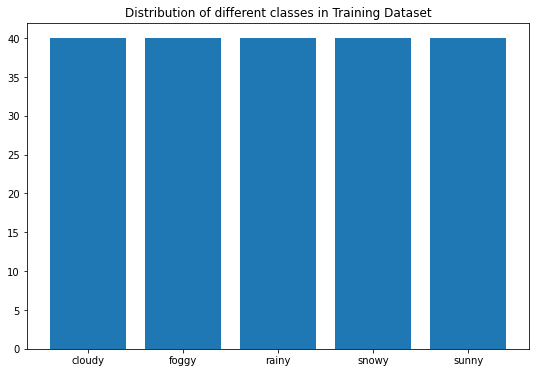

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 40
Training foggy images are: 40
Training rainy images are: 40
Training snowy images are: 40
Training sunny images are: 40


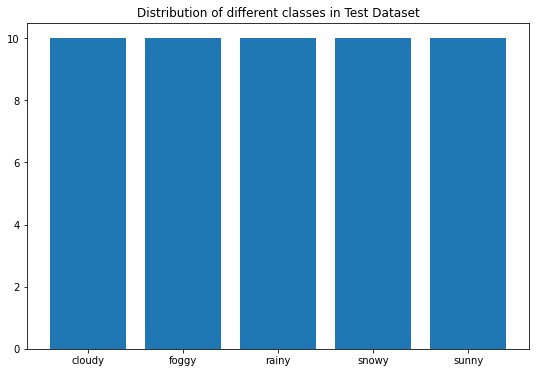

In [ ]:
image_folder = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/test/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

In [ ]:
for i in ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/test/'+i+'/'))))

Valid cloudy images are: 10
Valid foggy images are: 10
Valid rainy images are: 10
Valid snowy images are: 10
Valid sunny images are: 10


#Step 3. Deep Learning with Data Augumentation

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=16

In [ ]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

In [ ]:
TEST_DIR = '/content/weather-data/test/'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    # Conv2D(64, (3, 3), activation='relu'),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D(2, 2),
    # Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    Flatten(),
   # Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=test_generator,
                              callbacks = [best_model]
                              )

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 0s 47ms/step - loss: 1.7267 - accuracy: 0.7200


[1.7267247438430786, 0.7200000286102295]

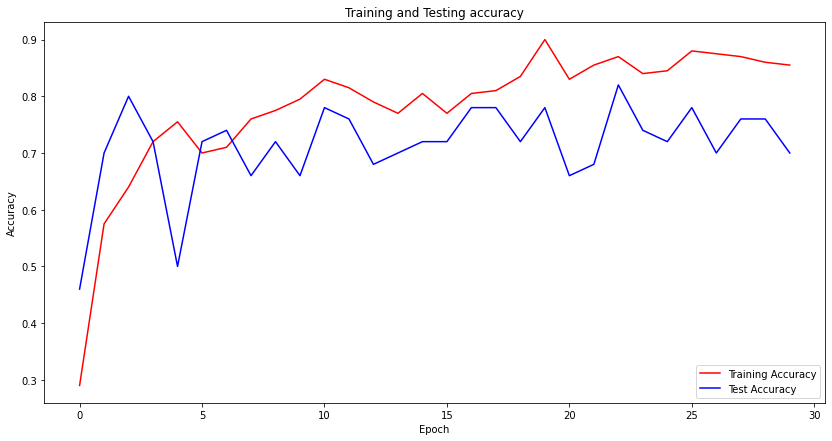

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
matrix = metrics.confusion_matrix(test_generator.argmax(axis=1), train_generator.argmax(axis=1))

In [ ]:
# import numpy as np
# from keras import backend as K
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, 50 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1 2 1 4 2]
 [0 2 0 2 6]
 [1 1 1 5 2]
 [1 2 1 4 2]
 [2 1 3 3 1]]
Classification Report
              precision    recall  f1-score   support

      cloudy       0.20      0.10      0.13        10
       foggy       0.25      0.20      0.22        10
       rainy       0.17      0.10      0.12        10
       snowy       0.22      0.40      0.29        10
       sunny       0.08      0.10      0.09        10

    accuracy                           0.18        50
   macro avg       0.18      0.18      0.17        50
weighted avg       0.18      0.18      0.17        50



In [ ]:
# import seaborn as sb
# %matplotlib inline'
import matplotlib.pyplot as plt
# sb.heatmap(cm,annot=True)
plt.confusion_matrix(classifier,test_generator, y_pred,
                             display_labels=target_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)

**___________________________________________________________________**

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/Rome Weather", output="FINAL",
    # seed=1337, 
    ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# # Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.
# splitfolders.fixed("/content/Rome Weather", output="output",
#     seed=1337, fixed=(10, 10), oversample=False, group_prefix=None, move=False) # default values

Copying files: 250 files [00:00, 4474.94 files/s]


In [ ]:
TRAINING_DIR = '/content/FINAL/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0)
                                  #  rotation_range=30,
                                  #  zoom_range=0.4,
                                  #  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 200 images belonging to 5 classes.


In [ ]:
Test_DIR = '/content/FINAL/test'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(Test_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 25 images belonging to 5 classes.


In [ ]:
Valid_DIR = '/content/FINAL/val'

val_datagen = ImageDataGenerator(rescale = 1/255.0)

val_generator = test_datagen.flow_from_directory(Valid_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 25 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    # Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=val_generator,
                              callbacks = [best_model]
                              )

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 1.6655 - accuracy: 0.1550

13/13 [==============================] - 42s 3s/step - loss: 1.6655 - accuracy: 0.1550 - val_loss: 1.5861 - val_accuracy: 0.2000
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 1.5865 - accuracy: 0.2450

13/13 [==============================] - 30s 2s/step - loss: 1.5865 - accuracy: 0.2450 - val_loss: 1.5591 - val_accuracy: 0.3600
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 1.4095 - accuracy: 0.3450

13/13 [==============================] - 31s 2s/step - loss: 1.4095 - accuracy: 0.3450 - val_loss: 1.4572 - val_accuracy: 0.3600
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 1.3442 - accuracy: 0.4000

13/13 [==============================] - 30s 2s/step - loss: 1.3442 - accuracy: 0.4000 - val_loss: 1.3396 - val_accuracy: 0.4000
Epoch 5/20
13/13 [==============================] - ETA: 0s - loss: 1.2842 - accuracy: 0.5100

13/13 [==============================] - 31s 2s/step - loss: 1.2842 - accuracy: 0.5100 - val_loss: 1.2092 - val_accuracy: 0.4400
Epoch 6/20
13/13 [==============================] - ETA: 0s - loss: 1.1258 - accuracy: 0.4850

13/13 [==============================] - 30s 2s/step - loss: 1.1258 - accuracy: 0.4850 - val_loss: 1.1950 - val_accuracy: 0.4400
Epoch 7/20
13/13 [==============================] - ETA: 0s - loss: 1.0744 - accuracy: 0.5100

13/13 [==============================] - 30s 2s/step - loss: 1.0744 - accuracy: 0.5100 - val_loss: 1.1621 - val_accuracy: 0.4800
Epoch 8/20
13/13 [==============================] - ETA: 0s - loss: 1.0888 - accuracy: 0.5450

13/13 [==============================] - 30s 2s/step - loss: 1.0888 - accuracy: 0.5450 - val_loss: 1.2001 - val_accuracy: 0.4800
Epoch 9/20
13/13 [==============================] - ETA: 0s - loss: 1.0049 - accuracy: 0.5500

13/13 [==============================] - 30s 2s/step - loss: 1.0049 - accuracy: 0.5500 - val_loss: 1.2011 - val_accuracy: 0.4800
Epoch 10/20
13/13 [==============================] - ETA: 0s - loss: 0.9695 - accuracy: 0.5850

13/13 [==============================] - 30s 2s/step - loss: 0.9695 - accuracy: 0.5850 - val_loss: 1.0910 - val_accuracy: 0.5200
Epoch 11/20
13/13 [==============================] - ETA: 0s - loss: 0.8993 - accuracy: 0.6500

13/13 [==============================] - 30s 2s/step - loss: 0.8993 - accuracy: 0.6500 - val_loss: 1.2374 - val_accuracy: 0.5200
Epoch 12/20
13/13 [==============================] - ETA: 0s - loss: 0.8789 - accuracy: 0.6400

13/13 [==============================] - 30s 2s/step - loss: 0.8789 - accuracy: 0.6400 - val_loss: 1.1852 - val_accuracy: 0.5200
Epoch 13/20
13/13 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.7150

13/13 [==============================] - 30s 2s/step - loss: 0.7005 - accuracy: 0.7150 - val_loss: 1.3826 - val_accuracy: 0.4400
Epoch 14/20
13/13 [==============================] - ETA: 0s - loss: 0.6482 - accuracy: 0.6850

13/13 [==============================] - 30s 2s/step - loss: 0.6482 - accuracy: 0.6850 - val_loss: 1.3945 - val_accuracy: 0.6000
Epoch 15/20
13/13 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.8050

13/13 [==============================] - 30s 2s/step - loss: 0.5712 - accuracy: 0.8050 - val_loss: 1.7616 - val_accuracy: 0.4400
Epoch 16/20
13/13 [==============================] - ETA: 0s - loss: 0.6624 - accuracy: 0.7550

13/13 [==============================] - 30s 2s/step - loss: 0.6624 - accuracy: 0.7550 - val_loss: 1.4636 - val_accuracy: 0.5200
Epoch 17/20
13/13 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8400

13/13 [==============================] - 30s 2s/step - loss: 0.3912 - accuracy: 0.8400 - val_loss: 1.6746 - val_accuracy: 0.5200
Epoch 18/20
13/13 [==============================] - ETA: 0s - loss: 0.3571 - accuracy: 0.8550

13/13 [==============================] - 30s 2s/step - loss: 0.3571 - accuracy: 0.8550 - val_loss: 1.7991 - val_accuracy: 0.5200
Epoch 19/20
13/13 [==============================] - ETA: 0s - loss: 0.3260 - accuracy: 0.8550

13/13 [==============================] - 30s 2s/step - loss: 0.3260 - accuracy: 0.8550 - val_loss: 2.3708 - val_accuracy: 0.5600
Epoch 20/20
13/13 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9300

13/13 [==============================] - 30s 2s/step - loss: 0.2036 - accuracy: 0.9300 - val_loss: 1.7057 - val_accuracy: 0.6000


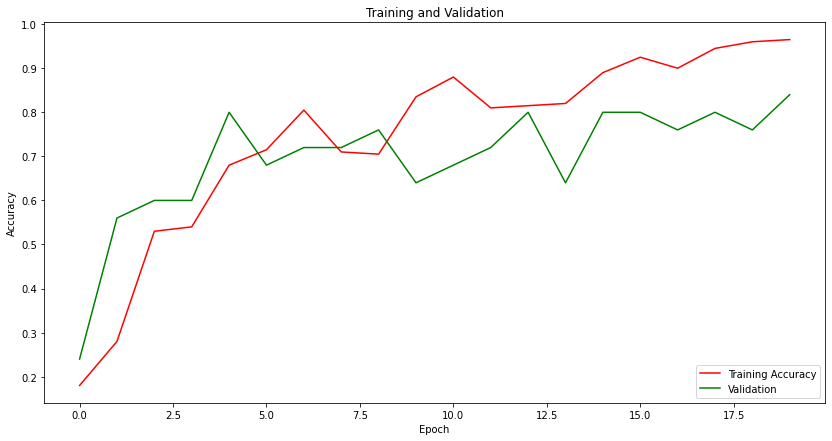

In [ ]:
6import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
#plt.plot(epochs, val_acc, 'b', label="Test Accuracy")
plt.plot(epochs, val_acc, 'g', label="Validation")


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 21ms/step - loss: 2.0007 - accuracy: 0.6800


[2.000749111175537, 0.6800000071525574]

In [ ]:
#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Y_pred = model.predict_generator(test_generator, 50 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1 1 1 2 0]
 [0 0 2 2 1]
 [3 0 0 1 1]
 [1 1 0 1 2]
 [2 2 0 1 0]]
Classification Report
              precision    recall  f1-score   support

      cloudy       0.14      0.20      0.17         5
       foggy       0.00      0.00      0.00         5
       rainy       0.00      0.00      0.00         5
       snowy       0.14      0.20      0.17         5
       sunny       0.00      0.00      0.00         5

    accuracy                           0.08        25
   macro avg       0.06      0.08      0.07        25
weighted avg       0.06      0.08      0.07        25



In [ ]:
Test_DIR = '/content/FINAL_0/test'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(Test_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 25 images belonging to 5 classes.


In [ ]:
Valid_DIR = '/content/FINAL_0/val'

val_datagen = ImageDataGenerator(rescale = 1/255.0)

val_generator = test_datagen.flow_from_directory(Valid_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 25 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
])
model.summary()

ValueError: ignored

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
import splitfolders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/Rome Weather", output="FINAL_0",
    # seed=1337, 
    ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# # Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.
# splitfolders.fixed("/content/Rome Weather", output="output",
#     seed=1337, fixed=(10, 10), oversample=False, group_prefix=None, move=False) # default values

Copying files: 250 files [00:00, 7436.76 files/s]


In [ ]:
TRAINING_DIR = '/content/FINAL_0/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0)
                                  #  rotation_range=30,
                                  #  zoom_range=0.4,
                                  #  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 200 images belonging to 5 classes.


#DATA AUGMENTATION_1

In [ ]:
import imgaug.augmenters as iaa
import cv2
import glob

In [ ]:
images = []
images_path = glob.glob("/content/weather-data/train/*.jpg")
for img_path in images_path:
    img = cv2.imread(img_path)
    images.append(img)

In [ ]:
# 2. Image Augmentation
augmentation = iaa.Sequential([
    # 1. Flip
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    # 2. Affine
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
               rotate=(-30, 30),
               scale=(0.5, 1.5)),
    # 3. Multiply
    iaa.Multiply((0.8, 1.2)),
    # 4. Linearcontrast
    iaa.LinearContrast((0.6, 1.4)),
    # Perform methods below only sometimes
    iaa.Sometimes(0.5,
        # 5. GaussianBlur
        iaa.GaussianBlur((0.0, 3.0))
        )
])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

In [ ]:
train_1_dir = '/content/train_1/'
os.mkdir(train_1_dir)

In [ ]:
d_path=r'/content/train_1/'

# 3. Show Images
# while True:
augmented_images = augmentation(images=images)
def final(images_path,train_1_dir):
  for img in images_path:
    new_img = cv2.imread(img)
    augmented_images(new_img,1)
final(images_path,train_1_dir)
    
#     for img in augmented_images:
#         # cv2.imshow("Image", img)
#         # cv2.waitKey(0)
#         new_img = cv2.imread(img)
#         aug_img(new_img,1)
# final()

In [ ]:
import numpy as np

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(original_dataset_dir, train_dir)
# conf_mat

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(confusion_matrix, classes=classes, title='Confusion matrix, without normalization')
plt.show()

NameError: ignored

<Figure size 504x432 with 0 Axes>

In [ ]:
from google.colab import files
data=files.upload()

In [ ]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))